In [7]:
# Dependencies
import os
import requests
import json
import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import hvplot.pandas

In [11]:
building_df = pd.read_csv('/Users/archanakale/Documents/GitHub/project-three-team-two/Resources/ETL_Dataset.csv')
building_df.head()

,B_HashedKey,B_FullName,B_ShortName,B_StreetAddress,B_Suburb,B_PostCode,B_State,B_Geocode,B_Longitude,B_Latitude,...,CRT_Nabers_AnnualConsumption,CRT_Nabers_OwnerName,TLA_Name,TLA_AssessorName,TLA_NetLettableSpace,FS_Name,FS_Level,FS_NLA,CRT_BuildingNla,CRT_NumberOfLevels
0,7276178987180364258,"31 Joseph Street, Blackburn North, VIC, 3130",NaN,31 Joseph Street,Blackburn North,3130,VIC,GAVIC425495402,145.146133,-37.800669,...,8994400.8,Yarra Group Holdings Pty Ltd,"31 Joseph Street, Blackburn North, VIC, 3130 -...",Alex Hardingham - CBDA0389,8553.1,Part Ground Level - Retail,0.0,315.4,8553.1,3.0
1,7276178987180364258,"31 Joseph Street, Blackburn North, VIC, 3130",NaN,31 Joseph Street,Blackburn North,3130,VIC,GAVIC425495402,145.146133,-37.800669,...,11648467.6,Yarra Group Holdings Pty Ltd,"31 Joseph Street, Blackburn North, VIC, 3130 -...",Alex Hardingham - CBDA0389,8553.1,Part Ground Level - Retail,0.0,315.4,8717.6,3.0
2,7276178987180364258,"31 Joseph Street, Blackburn North, VIC, 3130",NaN,31 Joseph Street,Blackburn North,3130,VIC,GAVIC425495402,145.146133,-37.800669,...,8994400.8,Yarra Group Holdings Pty Ltd,"31 Joseph Street, Blackburn North, VIC, 3130 -...",Alex Hardingham - CBDA0389,8553.1,Part Ground Level - Suite 1,0.0,381.1,8553.1,3.0
3,7276178987180364258,"31 Joseph Street, Blackburn North, VIC, 3130",NaN,31 Joseph Street,Blackburn North,3130,VIC,GAVIC425495402,145.146133,-37.800669,...,11648467.6,Yarra Group Holdings Pty Ltd,"31 Joseph Street, Blackburn North, VIC, 3130 -...",Alex Hardingham - CBDA0389,8553.1,Part Ground Level - Suite 1,0.0,381.1,8717.6,3.0
4,7276178987180364258,"31 Joseph Street, Blackburn North, VIC, 3130",NaN,31 Joseph Street,Blackburn North,3130,VIC,GAVIC425495402,145.146133,-37.800669,...,8994400.8,Yarra Group Holdings Pty Ltd,"31 Joseph Street, Blackburn North, VIC, 3130 -...",Alex Hardingham - CBDA0389,8553.1,Part Ground Level - Suite 2,0.0,254.6,8553.1,3.0


In [19]:
building_df = building_df.drop(columns=['B_HashedKey', 'B_FullName', 'B_ShortName', 'B_StreetAddress', 'B_Geocode', 'TLA_Name', 'TLA_AssessorName', 'TLA_NetLettableSpace', 'FS_Name', 'FS_Level', 'FS_NLA'], errors='ignore')
building_df.head()


,B_Suburb,B_PostCode,B_State,B_Longitude,B_Latitude,CRT_HashedKey,CRT_Nabers_ReferenceNumber,CRT_Nabers_StarRating,CRT_Nabers_RatedArea,CRT_Nabers_RatedHours,CRT_Nabers_RatingScope,CRT_Nabers_AnnualEmissions,CRT_Nabers_AnnualEmissionIntensity,CRT_Nabers_AnnualConsumption,CRT_Nabers_OwnerName,CRT_BuildingNla,CRT_NumberOfLevels
0,Blackburn North,3130,VIC,145.146133,-37.800669,8629466962563437034,N56589,3.5,8016.4,45.9,Whole Building,1440882.0,179.742,8994400.8,Yarra Group Holdings Pty Ltd,8553.1,3.0
1,Blackburn North,3130,VIC,145.146133,-37.800669,3419183125040524821,N58939,3.0,8083.6,46.7,Whole Building,1750116.0,216.502,11648467.6,Yarra Group Holdings Pty Ltd,8717.6,3.0
2,Blackburn North,3130,VIC,145.146133,-37.800669,8629466962563437034,N56589,3.5,8016.4,45.9,Whole Building,1440882.0,179.742,8994400.8,Yarra Group Holdings Pty Ltd,8553.1,3.0
3,Blackburn North,3130,VIC,145.146133,-37.800669,3419183125040524821,N58939,3.0,8083.6,46.7,Whole Building,1750116.0,216.502,11648467.6,Yarra Group Holdings Pty Ltd,8717.6,3.0
4,Blackburn North,3130,VIC,145.146133,-37.800669,8629466962563437034,N56589,3.5,8016.4,45.9,Whole Building,1440882.0,179.742,8994400.8,Yarra Group Holdings Pty Ltd,8553.1,3.0


In [21]:
# list of suburbs
suburbs = building_df['B_Suburb'].unique()
suburbs

array(['Blackburn North', 'Melbourne', 'Docklands', 'Hamilton',
       'Mount Waverley', 'St Kilda', 'Cheltenham', 'Box Hill',
       'Broadmeadows', 'Wantirna South', 'South Yarra', 'Southbank',
       'Preston', 'Hawthorn', 'Mulgrave', 'Kyabram', 'Cranbourne',
       'East Melbourne', 'Forest Hill', 'Sale', 'Blackburn', 'Carlton',
       'Notting Hill', 'Ballarat Central', 'Doncaster', 'Morwell',
       'Colac', 'Boronia', 'Mildura', 'West Melbourne', 'Springvale',
       'South Melbourne', 'Canterbury', 'Malvern East', 'Port Melbourne',
       'Camberwell', 'Hawthorn East', 'Bentleigh East', 'Epping',
       'Essendon Fields', 'Cremorne', 'Burwood', 'Dandenong',
       'Abbotsford', 'Geelong', 'Moonee Ponds', 'Moorabbin', 'Richmond',
       'South Wharf', 'North Melbourne', 'West Wodonga',
       'Moorabbin Airport', 'Burnley', 'Footscray', 'Clayton South',
       'Traralgon', 'Burwood East', 'Ballarat', 'Bayswater',
       'Chirnside Park', 'Bentleigh', 'Sunshine', 'Box Hill South'

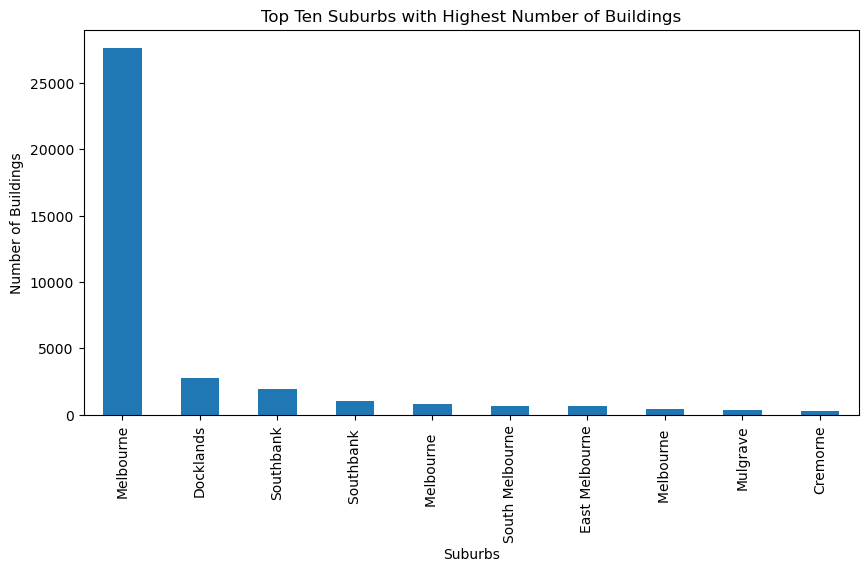

In [22]:
# Top ten suburbs with highest number of buildings
building_df['B_Suburb'].value_counts().nlargest(10)

# bar chart of top ten suburbs with highest number of buildings
building_df['B_Suburb'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title('Top Ten Suburbs with Highest Number of Buildings')
plt.ylabel('Number of Buildings')
plt.xlabel('Suburbs')
plt.show()

In [48]:
# Clip the values in the 'CRT_NumberOfLevels' column to the range 0 to 100
building_df['CRT_NumberOfLevels'] = building_df['CRT_NumberOfLevels'].clip(0, 100)

# remove nan values from 'CRT_NumberOfLevels' column
building_df = building_df.dropna(subset=['CRT_NumberOfLevels'])


# hvplot scatter plot of top 10 'B_Suburb' vs 'CRT_NumberOfLevels'
building_df.hvplot.scatter(x='B_Suburb', y='CRT_NumberOfLevels', title='Suburbs vs Number of Levels', rot=90, height=400, width=1000)



:Scatter   [B_Suburb]   (CRT_NumberOfLevels)

In [35]:
#%%capture --no-display
import hvplot.pandas

!pip install cartopy
!pip install geoviews
!pip install pyproj




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 12.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.2 MB/s eta 0:00:00a 0:00:01
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.0/557.0 kB 7.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 12.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: param
    Found existing installation: param 2.0.2
    Uninstalling 

In [38]:
# configure the map plot of top 20 suburbs with highest annual energy consumption
import geoviews as gv
import geoviews.feature as gf
import cartopy.crs as ccrs
import cartopy.feature as cf
import hvplot.pandas

# Create a map plot of top 20 suburbs with highest annual energy consumption
top_20_suburbs = building_df.groupby('B_Suburb')['CRT_Nabers_AnnualConsumption'].sum().nlargest(20).reset_index()
top_20_suburbs = top_20_suburbs.merge(building_df, on='B_Suburb', how='left')
top_20_suburbs = top_20_suburbs.drop_duplicates(subset=['B_Suburb'])
top_20_suburbs = top_20_suburbs.drop(columns=['B_Suburb', 'CRT_Nabers_AnnualConsumption'], errors='ignore')
top_20_suburbs = top_20_suburbs.dropna()
top_20_suburbs = top_20_suburbs.drop_duplicates(subset=['B_Latitude', 'B_Longitude'])

top_20_suburbs.hvplot.points('B_Longitude', 'B_Latitude', geo=True, tiles='OSM', size=100, frame_width=800, frame_height=600, title='Top 20 Suburbs with Highest Annual Energy Consumption')



:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [B_Longitude,B_Latitude]

In [50]:
# group suburbs as per the CRT_Nabers_StarRating
# Group suburbs by the 'CRT_Nabers_StarRating'
grouped_df = building_df.groupby(['CRT_Nabers_StarRating', 'B_Suburb']).size().reset_index(name='Count')

# Display the grouped DataFrame
grouped_df

,CRT_Nabers_StarRating,B_Suburb,Count
0,0.0,Abbotsford,40
1,0.0,Bendigo,2
2,0.0,Bentleigh East,12
3,0.0,Blackburn,3
4,0.0,Burnley,6
...,...,...,...
352,6.0,Docklands,131
353,6.0,Melbourne,244
354,6.0,Mulgrave,7
355,6.0,Richmond,5


In [65]:
# Calculate the average 'CRT_Nabers_StarRating' for each suburb
average_ratings = building_df.groupby('B_Suburb')['CRT_Nabers_StarRating'].mean()

# Select the top 20 suburbs with the highest average rating
top_20_suburbs = average_ratings.nlargest(20)

# Convert the Series to a DataFrame
top_20_suburbs_df = top_20_suburbs.reset_index()

# Display the DataFrame
top_20_suburbs_df

,B_Suburb,CRT_Nabers_StarRating
0,North Geelong,5.360294
1,Mildura,5.250000
2,Geelong,5.004808
3,Brunswick,5.000000
4,Mornington,5.000000
5,Williams Landing,5.000000
6,Docklands,4.894899
7,South Wharf,4.812500
8,Sale,4.800000
9,Southbank,4.645000


In [66]:
# Create a bar chart of the top 20 suburbs with the highest average rating
top_20_suburbs_df.hvplot.bar(x='B_Suburb', y='CRT_Nabers_StarRating', title='Top 20 Suburbs with Highest Average Star Rating', rot=90, height=400, width=1000)

:Bars   [B_Suburb]   (CRT_Nabers_StarRating)